# Q1b

#### 1. b) create two separate customer segmentations (using clustering) to split them into 3-5 clusters:based on their banking behavior. We can take following things into consideration as banking behavior:
#### - do they have savings account? How much do they save?
#### - do they have credit account? How much do they live in debt?
#### - are they making lot of small transactions or few huge ones?

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df_savings = pd.read_csv("twm_savings_tran.csv", delimiter= ";")

In [4]:
df_savings.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [5]:
df_credit = pd.read_csv("twm_credit_tran.csv", delimiter=";")

In [6]:
df_credit.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [7]:
pd.concat([df_savings,df_credit])

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.00,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.00,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.00,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.00,-736.70,16.10.1995,145535,E,CG


In [8]:
df_joined = pd.concat([df_savings,df_credit])

In [9]:
df_joined.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [10]:
df_joined_counted = df_joined[['acct_nbr', 'tran_id']].groupby(['acct_nbr']).count()
df_joined_counted.rename(columns = {'tran_id': '#_of_tran'}, inplace = True)

KeyError: "['acct_nbr'] not in index"

In [11]:
df_accts = pd.read_csv('twm_accounts.csv', delimiter = ';')                        
df_ck_accts = pd.read_csv('twm_checking_acct.csv', delimiter = ';')          
df_cc_accts = pd.read_csv('twm_credit_acct.csv', delimiter = ';')             
df_sv_accts = pd.read_csv('twm_savings_acct.csv', delimiter = ';')            

df_trans = pd.read_csv('twm_transactions.csv', delimiter = ';')                
df_sv_tran = pd.read_csv('twm_savings_tran.csv', delimiter = ';')                
df_ck_tran = pd.read_csv('twm_checking_tran.csv', delimiter = ';')              
df_cc_tran = pd.read_csv('twm_credit_tran.csv', delimiter = ';')   

In [12]:
df_accts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [13]:
df_accts.query('starting_balance < 500')

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
5,4561143213631020,1363102,CC,Y,30.11.1995,NaN,0.00,1000.00
6,4561143213633270,1363327,CC,Y,2.4.1995,NaN,0.00,3000.00
7,13628972,1362897,CK,Y,1.8.1995,NaN,152.12,52.33
...,...,...,...,...,...,...,...,...
1388,13626683,1362668,SV,Y,29.11.1990,NaN,213.91,1470.67
1389,13629803,1362980,SV,Y,23.12.1995,NaN,232.00,310.32
1392,4561143213627210,1362721,CC,Y,17.10.1995,NaN,0.00,1000.00
1402,13628933,1362893,SV,Y,3.8.1995,NaN,290.57,976.43


In [14]:
df_accts_group = df_accts.groupby(['cust_id', 'acct_type']).count()

In [15]:
df_accts_group = df_accts_group.groupby(['cust_id', 'acct_type'])['ending_balance'].count()
df_accts_group = df_accts_group.unstack(level=1)
df_accts_group = df_accts_group.fillna(0).reset_index()

In [16]:
df_accts_group

acct_type,cust_id,CC,CK,SV
0,1362480,1.0,1.0,1.0
1,1362484,1.0,1.0,1.0
2,1362485,1.0,1.0,0.0
3,1362486,0.0,1.0,1.0
4,1362487,1.0,1.0,1.0
...,...,...,...,...
660,1363490,0.0,0.0,1.0
661,1363491,0.0,0.0,1.0
662,1363492,1.0,1.0,1.0
663,1363493,1.0,1.0,1.0


In [17]:
df_accts_group.columns

Index(['cust_id', 'CC  ', 'CK  ', 'SV  '], dtype='object', name='acct_type')

In [18]:
df_sv_accts = pd.read_csv('twm_savings_acct.csv', delimiter = ';')   

In [19]:
df_cc_accts = pd.read_csv('twm_credit_acct.csv', delimiter = ';') 

In [20]:
df_sv_accts

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [21]:
df_sv_accts = df_sv_accts.drop(columns = ['minimum_balance','acct_type', 'account_active', 'acct_start_date','acct_end_date','starting_balance'])

In [22]:
df_sv_accts

,cust_id,acct_nbr,ending_balance
0,1363160,13631603,122.54
1,1362487,13624873,12.89
2,1362548,13625483,254.02
3,1362752,13627523,609.33
4,1363017,13630173,2901.35
...,...,...,...
416,1363141,13631413,528.57
417,1363038,13630383,508.26
418,1362529,13625293,873.14
419,1362895,13628953,96.25


In [23]:
df_accts_group = pd.merge(df_accts_group, df_sv_accts, how = 'left', on = "cust_id")

In [24]:
df_accts_group

,cust_id,CC,CK,SV,acct_nbr,ending_balance
0,1362480,1.0,1.0,1.0,13624803.0,1187.97
1,1362484,1.0,1.0,1.0,13624843.0,2122.17
2,1362485,1.0,1.0,0.0,NaN,NaN
3,1362486,0.0,1.0,1.0,13624863.0,116.24
4,1362487,1.0,1.0,1.0,13624873.0,12.89
...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53
661,1363491,0.0,0.0,1.0,13634913.0,17.82
662,1363492,1.0,1.0,1.0,13634923.0,1116.10
663,1363493,1.0,1.0,1.0,13634933.0,553.61


In [25]:
df_accts_group.rename(columns= {"acct_nbr" : "sv_acct_num"}, inplace = True)
df_accts_group.rename(columns= {"ending_balance" : "sv_balance"}, inplace = True)

In [26]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance
0,1362480,1.0,1.0,1.0,13624803.0,1187.97
1,1362484,1.0,1.0,1.0,13624843.0,2122.17
2,1362485,1.0,1.0,0.0,NaN,NaN
3,1362486,0.0,1.0,1.0,13624863.0,116.24
4,1362487,1.0,1.0,1.0,13624873.0,12.89
...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53
661,1363491,0.0,0.0,1.0,13634913.0,17.82
662,1363492,1.0,1.0,1.0,13634923.0,1116.10
663,1363493,1.0,1.0,1.0,13634933.0,553.61


In [27]:
df_cc_accts

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [28]:
df_cc_accts = df_cc_accts.drop(columns= ['credit_limit','credit_rating', 'account_active', 'acct_start_date','acct_end_date','starting_balance'])

In [29]:
df_cc_accts

,cust_id,acct_nbr,ending_balance
0,1363160,4561143213631600,286.69
1,1362487,4561143213624870,1548.23
2,1362548,4561143213625480,68.68
3,1362752,4561143213627520,0.00
4,1363017,4561143213630170,1000.00
...,...,...,...
463,1363364,4561143213633640,1785.97
464,1363467,4561143213634670,1500.00
465,1363263,4561143213632630,1218.94
466,1362569,4561143213625690,9200.00


In [30]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance
0,1362480,1.0,1.0,1.0,13624803.0,1187.97
1,1362484,1.0,1.0,1.0,13624843.0,2122.17
2,1362485,1.0,1.0,0.0,NaN,NaN
3,1362486,0.0,1.0,1.0,13624863.0,116.24
4,1362487,1.0,1.0,1.0,13624873.0,12.89
...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53
661,1363491,0.0,0.0,1.0,13634913.0,17.82
662,1363492,1.0,1.0,1.0,13634923.0,1116.10
663,1363493,1.0,1.0,1.0,13634933.0,553.61


In [31]:
df_accts_group = pd.merge(df_accts_group, df_cc_accts, how = 'left', on = "cust_id")

In [32]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,acct_nbr,ending_balance
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72
2,1362485,1.0,1.0,0.0,NaN,NaN,4.561143e+15,1100.00
3,1362486,0.0,1.0,1.0,13624863.0,116.24,NaN,NaN
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23
...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,17.82,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00


In [33]:
df_accts_group.rename(columns= {"acct_nbr" : "cc_acct_num"}, inplace = True)
df_accts_group.rename(columns= {"ending_balance" : "cc_balance"}, inplace = True)

In [34]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,cc_acct_num,cc_balance
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72
2,1362485,1.0,1.0,0.0,NaN,NaN,4.561143e+15,1100.00
3,1362486,0.0,1.0,1.0,13624863.0,116.24,NaN,NaN
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23
...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,17.82,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00


In [35]:
df_cc_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [36]:
df_cc_tran = df_cc_tran[['cust_id', 'tran_id']].groupby(['cust_id']).count()

In [37]:
df_cc_tran

,tran_id
cust_id,
1362480,32
1362484,55
1362485,72
1362487,32
1362489,35
...,...
1363483,77
1363484,39
1363485,23


In [38]:
df_cc_tran.rename(columns = {'tran_id': 'num_of_cc_transactions'}, inplace = True)

In [39]:
df_cc_tran

,num_of_cc_transactions
cust_id,
1362480,32
1362484,55
1362485,72
1362487,32
1362489,35
...,...
1363483,77
1363484,39
1363485,23


In [40]:
df_accts_group = pd.merge(df_accts_group, df_cc_tran, how = 'left', on = "cust_id")

In [41]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,cc_acct_num,cc_balance,num_of_cc_transactions
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00,32.0
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72,55.0
2,1362485,1.0,1.0,0.0,NaN,NaN,4.561143e+15,1100.00,72.0
3,1362486,0.0,1.0,1.0,13624863.0,116.24,NaN,NaN,NaN
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23,32.0
...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,NaN,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,17.82,NaN,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00,29.0
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00,NaN


In [42]:
df_sv_tran = pd.read_csv('twm_savings_tran.csv', delimiter = ';') 

In [43]:
df_sv_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [44]:
df_sv_tran = df_sv_tran[['cust_id', 'tran_id']].groupby(['cust_id']).count()
df_sv_tran

,tran_id
cust_id,
1362480,26
1362484,33
1362486,25
1362487,19
1362489,22
...,...
1363490,12
1363491,18
1363492,25


In [45]:
df_sv_tran.rename(columns = {'tran_id': 'num_of_sv_transactions'}, inplace = True)
df_sv_tran

,num_of_sv_transactions
cust_id,
1362480,26
1362484,33
1362486,25
1362487,19
1362489,22
...,...
1363490,12
1363491,18
1363492,25


In [46]:
df_accts_group = pd.merge(df_accts_group, df_sv_tran, how = 'left', on = "cust_id")
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,cc_acct_num,cc_balance,num_of_cc_transactions,num_of_sv_transactions
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00,32.0,26.0
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72,55.0,33.0
2,1362485,1.0,1.0,0.0,NaN,NaN,4.561143e+15,1100.00,72.0,NaN
3,1362486,0.0,1.0,1.0,13624863.0,116.24,NaN,NaN,NaN,25.0
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23,32.0,19.0
...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,NaN,NaN,NaN,12.0
661,1363491,0.0,0.0,1.0,13634913.0,17.82,NaN,NaN,NaN,18.0
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00,29.0,25.0
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00,NaN,19.0


In [47]:
df_accts_group = df_accts_group.fillna(0)

In [48]:
df_accts_group['total_balance'] = df_accts_group['sv_balance'] - df_accts_group['cc_balance']
df_accts_group['total_transactions'] = df_accts_group['num_of_cc_transactions'] + df_accts_group['num_of_sv_transactions']
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,cc_acct_num,cc_balance,num_of_cc_transactions,num_of_sv_transactions,total_balance,total_transactions
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00,32.0,26.0,1167.97,58.0
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72,55.0,33.0,1752.45,88.0
2,1362485,1.0,1.0,0.0,0.0,0.00,4.561143e+15,1100.00,72.0,0.0,-1100.00,72.0
3,1362486,0.0,1.0,1.0,13624863.0,116.24,0.000000e+00,0.00,0.0,25.0,116.24,25.0
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23,32.0,19.0,-1535.34,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,0.000000e+00,0.00,0.0,12.0,2301.53,12.0
661,1363491,0.0,0.0,1.0,13634913.0,17.82,0.000000e+00,0.00,0.0,18.0,17.82,18.0
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00,29.0,25.0,-5752.90,54.0
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00,0.0,19.0,553.61,19.0


In [49]:
df_accts_group

,cust_id,CC,CK,SV,sv_acct_num,sv_balance,cc_acct_num,cc_balance,num_of_cc_transactions,num_of_sv_transactions,total_balance,total_transactions
0,1362480,1.0,1.0,1.0,13624803.0,1187.97,4.561143e+15,20.00,32.0,26.0,1167.97,58.0
1,1362484,1.0,1.0,1.0,13624843.0,2122.17,4.561143e+15,369.72,55.0,33.0,1752.45,88.0
2,1362485,1.0,1.0,0.0,0.0,0.00,4.561143e+15,1100.00,72.0,0.0,-1100.00,72.0
3,1362486,0.0,1.0,1.0,13624863.0,116.24,0.000000e+00,0.00,0.0,25.0,116.24,25.0
4,1362487,1.0,1.0,1.0,13624873.0,12.89,4.561143e+15,1548.23,32.0,19.0,-1535.34,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,2301.53,0.000000e+00,0.00,0.0,12.0,2301.53,12.0
661,1363491,0.0,0.0,1.0,13634913.0,17.82,0.000000e+00,0.00,0.0,18.0,17.82,18.0
662,1363492,1.0,1.0,1.0,13634923.0,1116.10,4.561143e+15,6869.00,29.0,25.0,-5752.90,54.0
663,1363493,1.0,1.0,1.0,13634933.0,553.61,4.561143e+15,0.00,0.0,19.0,553.61,19.0


In [50]:
df_accts_group_clusters = df_accts_group[['cust_id', 'sv_balance','cc_balance', 'total_balance', 'total_transactions']]
df_accts_group_clusters

,cust_id,sv_balance,cc_balance,total_balance,total_transactions
0,1362480,1187.97,20.00,1167.97,58.0
1,1362484,2122.17,369.72,1752.45,88.0
2,1362485,0.00,1100.00,-1100.00,72.0
3,1362486,116.24,0.00,116.24,25.0
4,1362487,12.89,1548.23,-1535.34,51.0
...,...,...,...,...,...
660,1363490,2301.53,0.00,2301.53,12.0
661,1363491,17.82,0.00,17.82,18.0
662,1363492,1116.10,6869.00,-5752.90,54.0
663,1363493,553.61,0.00,553.61,19.0


In [51]:
# import kmeans 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [52]:
def plot_distortion(Z,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(Z)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

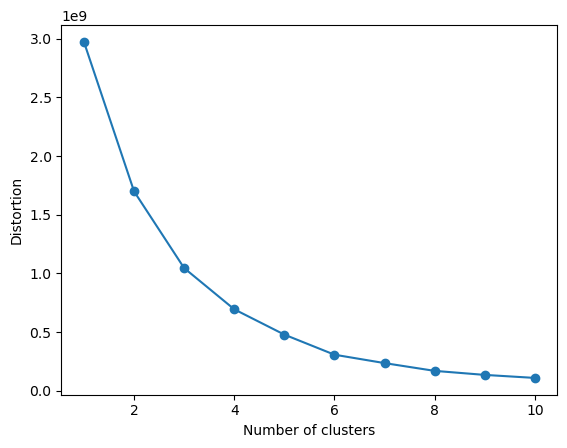

In [55]:
# elbow rule
plot_distortion(Z,max_clusters=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


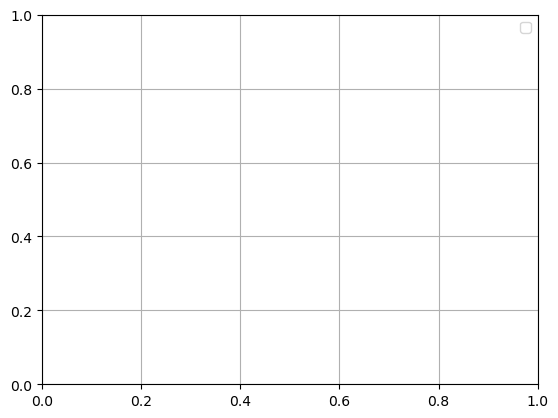

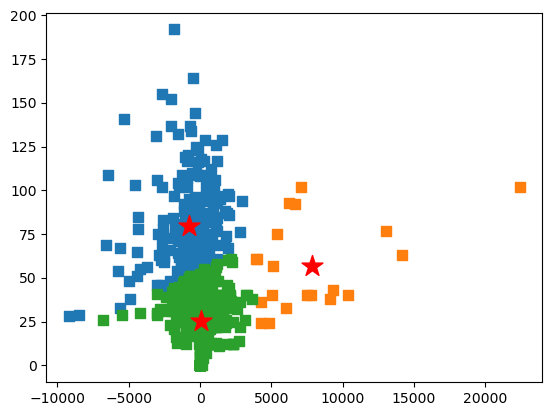

In [54]:
Z = df_accts_group_clusters.iloc[:, [3,4]].values
sc = StandardScaler()
Z_sc = sc.fit_transform(Z)


km = KMeans(n_clusters = 3, 
            n_init = 10,
            random_state = 0)

y_km = km.fit_predict(Z_sc)


def plot_clusters(Z, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res): 
        x = Z[y_res == cluster, 0]
        y = Z[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, 
                    y,
                    s = 50,
                    marker = 's',
                    label = f'cluster{cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, 
                    Y_centroids, 
                    marker = '*', 
                    c = 'red', 
                    s = 250, 
                    label = 'centroids')

plt.legend()
plt.grid()
plt.show()

plot_clusters(Z, y_km, plt_cluster_centers = True)

# Q2

### visualize the created clusters using radar charts and compare them agains each other

In [56]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(df_accts_group_clusters)
clusters_mnmx = pd.DataFrame(minmax_df,columns=df_accts_group_clusters.columns.to_list())

In [57]:
clusters_mnmx

,cust_id,sv_balance,cc_balance,total_balance,total_transactions
0,0.000000,0.264784,0.010526,1.639838,1.510417
1,0.019704,0.473006,0.194589,1.732282,2.291667
2,0.024631,0.000000,0.578947,1.281127,1.875000
3,0.029557,0.025909,0.000000,1.473493,0.651042
4,0.034483,0.002873,0.814858,1.212272,1.328125
...,...,...,...,...,...
660,4.975369,0.512984,0.000000,1.819127,0.312500
661,4.980296,0.003972,0.000000,1.457926,0.468750
662,4.985222,0.248765,3.615263,0.545207,1.406250
663,4.990148,0.123393,0.000000,1.542669,0.494792


In [58]:
kmeans= KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_accts_group_clusters)
k_labels = kmeans.labels_
new_columns = kmeans.predict(df_accts_group_clusters)
clusters = pd.DataFrame(new_columns)

In [59]:
clusters

,0
0,0
1,0
2,0
3,0
4,0
...,...
660,0
661,0
662,2
663,0


In [60]:
df_accts_group_clusters = pd.concat([clusters_mnmx, clusters], axis=1)
df_accts_group_clusters.rename(columns={0:'cluster'}, inplace=True)

In [61]:
df_accts_group_clusters

,cust_id,sv_balance,cc_balance,total_balance,total_transactions,cluster
0,0.000000,0.264784,0.010526,1.639838,1.510417,0
1,0.019704,0.473006,0.194589,1.732282,2.291667,0
2,0.024631,0.000000,0.578947,1.281127,1.875000,0
3,0.029557,0.025909,0.000000,1.473493,0.651042,0
4,0.034483,0.002873,0.814858,1.212272,1.328125,0
...,...,...,...,...,...,...
660,4.975369,0.512984,0.000000,1.819127,0.312500,0
661,4.980296,0.003972,0.000000,1.457926,0.468750,0
662,4.985222,0.248765,3.615263,0.545207,1.406250,2
663,4.990148,0.123393,0.000000,1.542669,0.494792,0


In [62]:
df_radar = df_accts_group_clusters.groupby('cluster').mean().divide(df_accts_group_clusters.drop('cluster',axis=1).mean())
df_radar

,cust_id,sv_balance,cc_balance,total_balance,total_transactions
cluster,,,,,
0,0.999593,0.724891,0.680565,1.005157,0.965426
1,0.853451,11.014026,0.642827,1.902974,1.244206
2,1.061325,0.676873,5.214680,0.588340,1.347840


In [63]:
import plotly.graph_objects as go

categories = df_radar.columns.to_list()
fig = go.Figure()

i=0
for index, series in df_radar.iterrows():
    r = []
    r.append(series.values)
    
    fig.add_trace(go.Scatterpolar(
        r=r[0],
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'))
    i+=1

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True)
  
fig.show()

## Q4

#### (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
##### - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

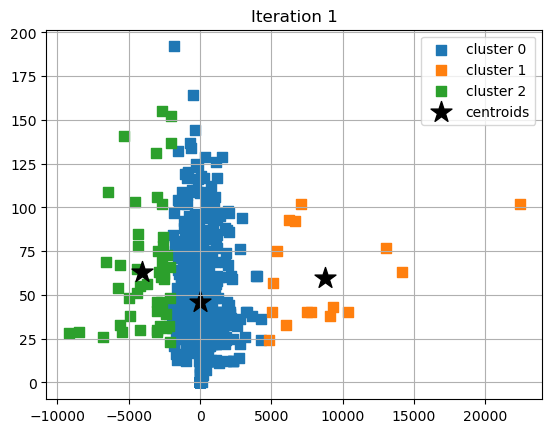

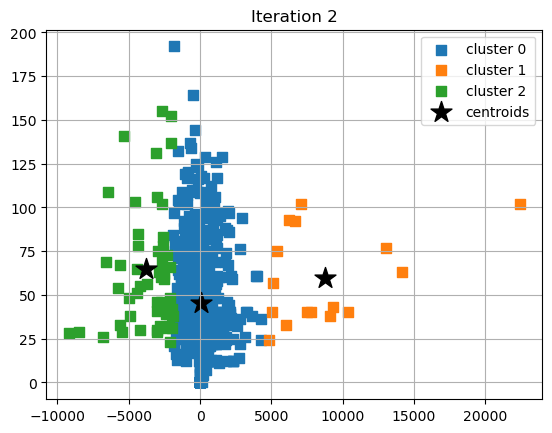

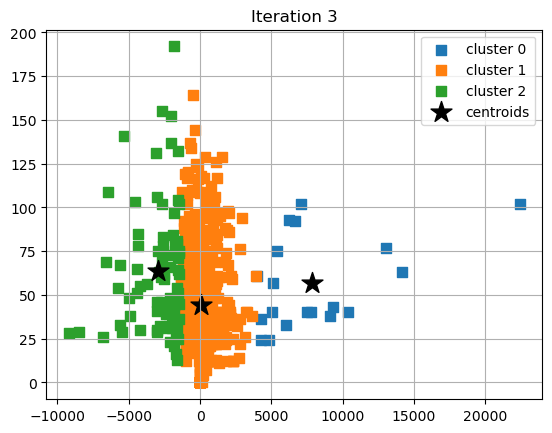

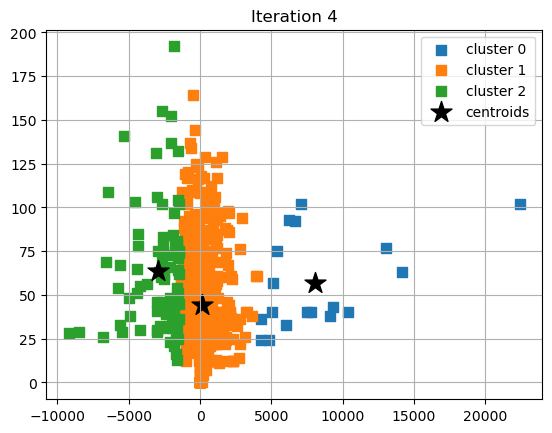

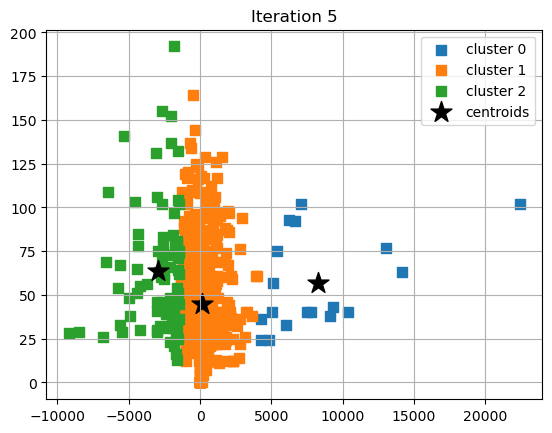

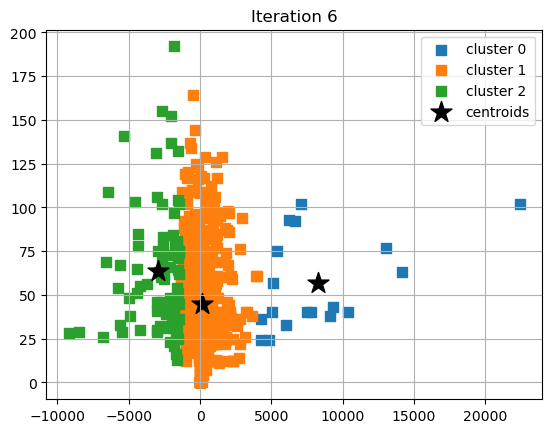

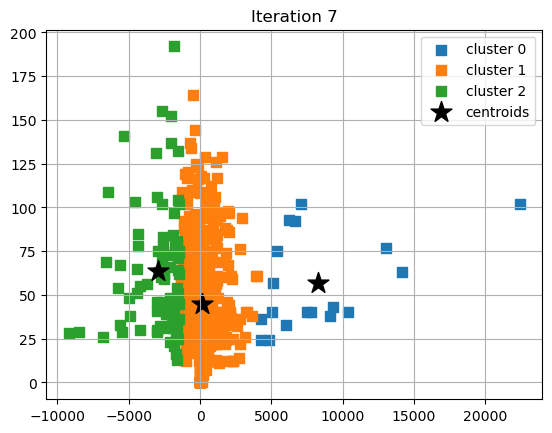

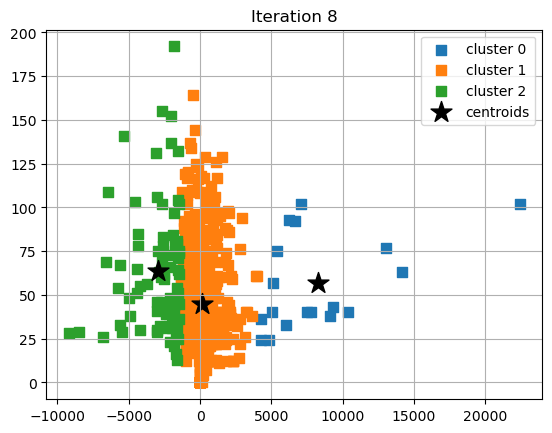

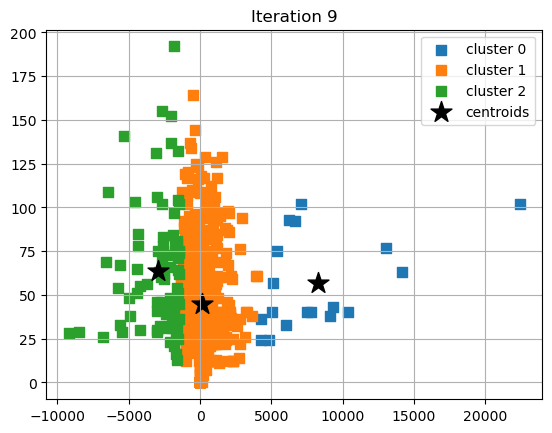

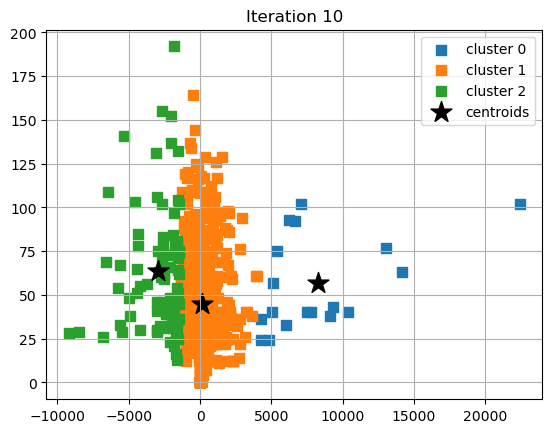

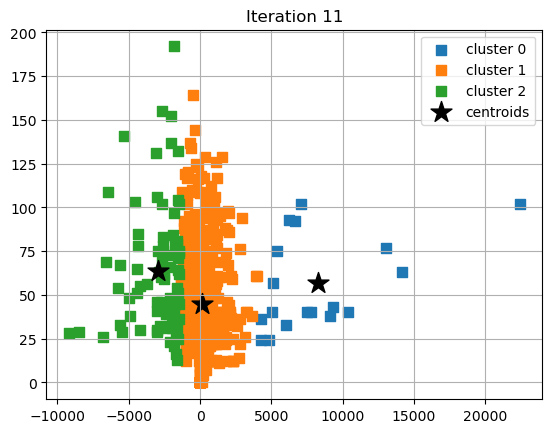

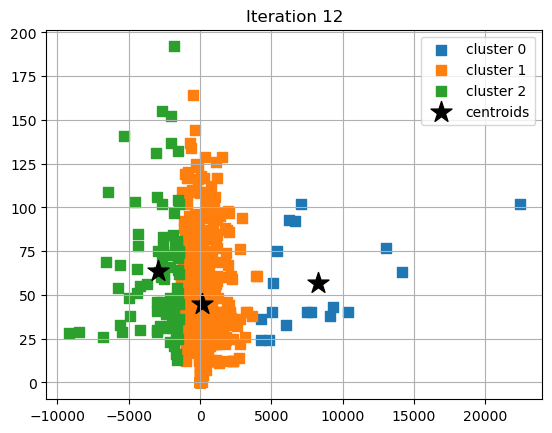

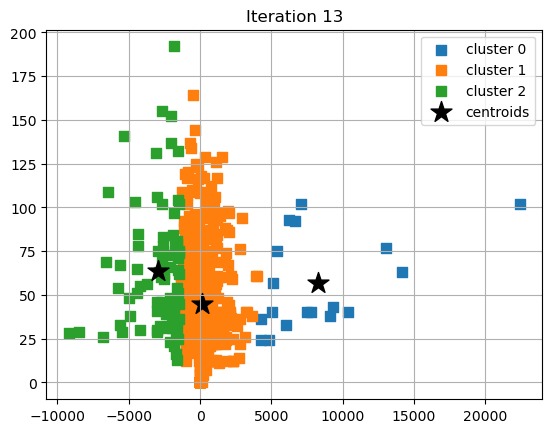

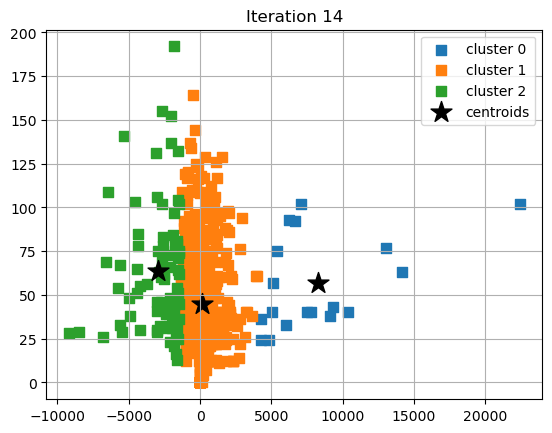

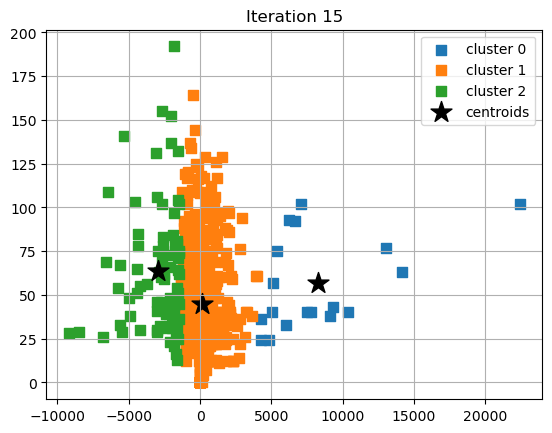

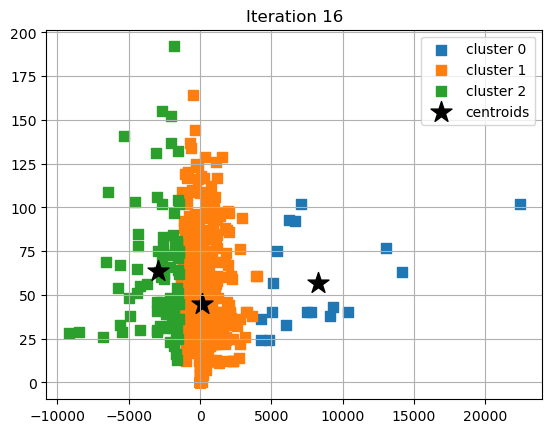

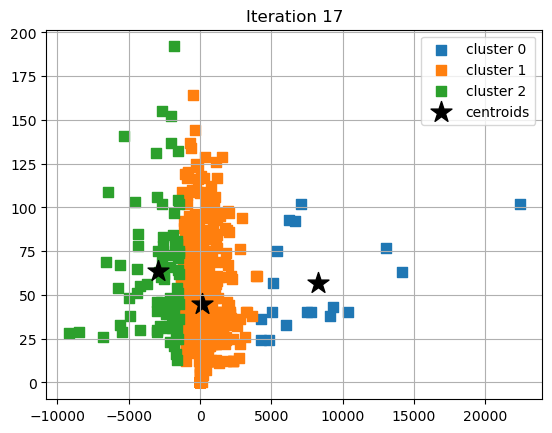

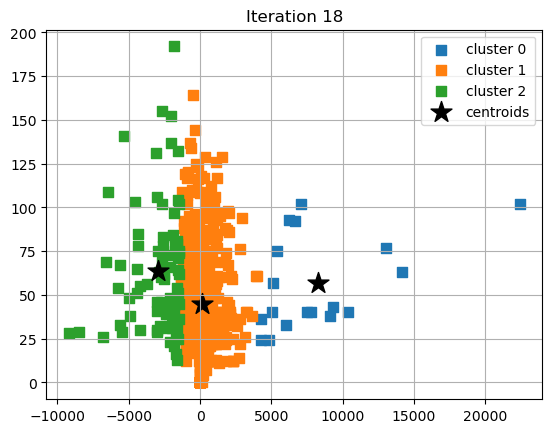

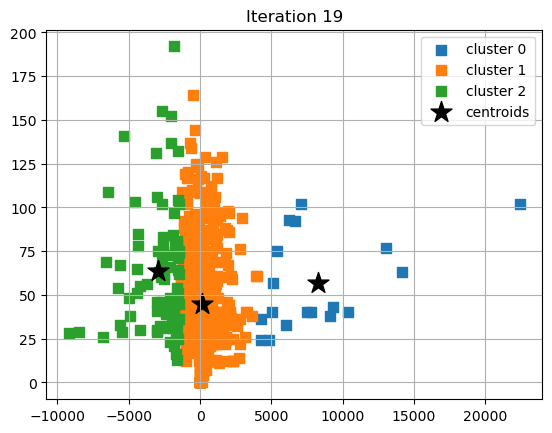

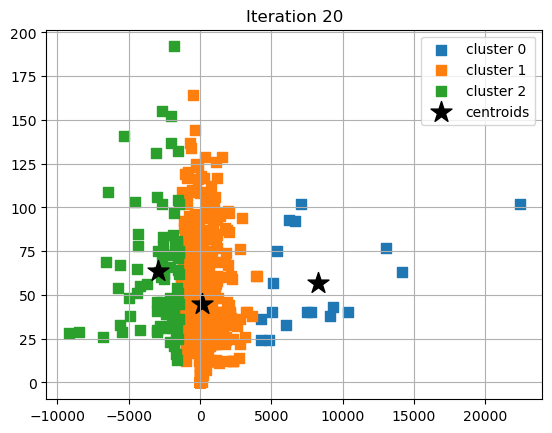

In [64]:
for i in range(1,21):
    temp = KMeans(n_clusters=3, max_iter=i, random_state=42).fit(Z)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = Z[clust_label == cluster, 0]
        y = Z[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
    plt.grid()
    plt.title(f'Iteration {i}')
    plt.savefig(f'/Users/Oswal/Documents/GitHub/mini-project-III/iterations {i} BB_labeled.png')
    plt.show()